#Recommendation System

#Data Description:

1. Unique ID of each anime.
2. Anime title.
3. Anime broadcast type, such as TV, OVA, etc.
4. anime genre.
5. The number of episodes of each anime.
6. The average rating for each anime compared to the number of users who gave ratings.


Number of community members for each anime.
#Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.

#Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

#Tasks:

##Data Preprocessing:

1. Load the dataset into a suitable data structure (e.g., pandas DataFrame).
2. Handle missing values, if any.
3. Explore the dataset to understand its structure and attributes.

In [2]:
# Loading the data set into a dataframe
anime = pd.read_csv('/content/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


#EDA

In [3]:
anime.info()
# Here there are total 12294 entries with 7 columns
# 'name','genre','type','episodes' are of the object dtype
# 'anime_id','members' are of the int64 dtype
# 'rating' is of the float64 dtype
# There are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
# For 'episodes', there are a several values labeled as 'Unknown' (still airing)
# To deal with this, I'll replace the 'Unknown' values with median of the 'episodes' column.
# To get median we need the int values, so converting 'Unknown' to 'NaN'.
anime['episodes'].replace('Unknown',np.nan, inplace=True)
anime['episodes'].fillna(anime['episodes'].median(), inplace=True)
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       2.0, '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '6', '8', '14', '7', '40', '15', '203', '77', '291', '120', '102',
       '96', '38', '79', '175', '103', '70', '153', '45', '5', '21', '63',
       '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358',
       '155', '104', '113', '54', '167', '161', '42', '142', '31', '373',
       '220', '46', '195', '17', '1787', '73', '147', '127', '16', '19',
       '98', '150', '76', '53', '124', '29', '115', '224', '44', '58',
       '93', '154', '92', '67', '172', '86', '30', '276', '59', '72',
       '330', '41', '105', '128', '137', '56', '55', '65', '243', '193',
       '18', '191', '180', '91', '192', '66', '182', '32', '164', '100',
       '296', '694', '95', '68', '117', '151', '130', '87',

In [5]:
# But we can still see the dtype is in object, hence we need to change it
anime['episodes']=pd.to_numeric(anime['episodes'], downcast='integer', errors='coerce')
anime.dtypes
# Data Type has changes from object to numeric

anime_id      int64
name         object
genre        object
type         object
episodes      int16
rating      float64
members       int64
dtype: object

### Handling the missing values

In [6]:
# Checking the total number of null values in all the columns
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
#'genre' and 'type' can be dealt with by replacing missing values with string 'None' instead of deleting it
anime['genre'].fillna('None', inplace=True)
anime['type'].fillna('None', inplace=True)
anime.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [8]:
# For 'rating' filling the missing values with the column's median value.
anime['rating'].fillna(anime['rating'].median(), inplace=True)
anime.isna().sum()
# So all the missing values have been handled

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

###Exploring the dataset

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


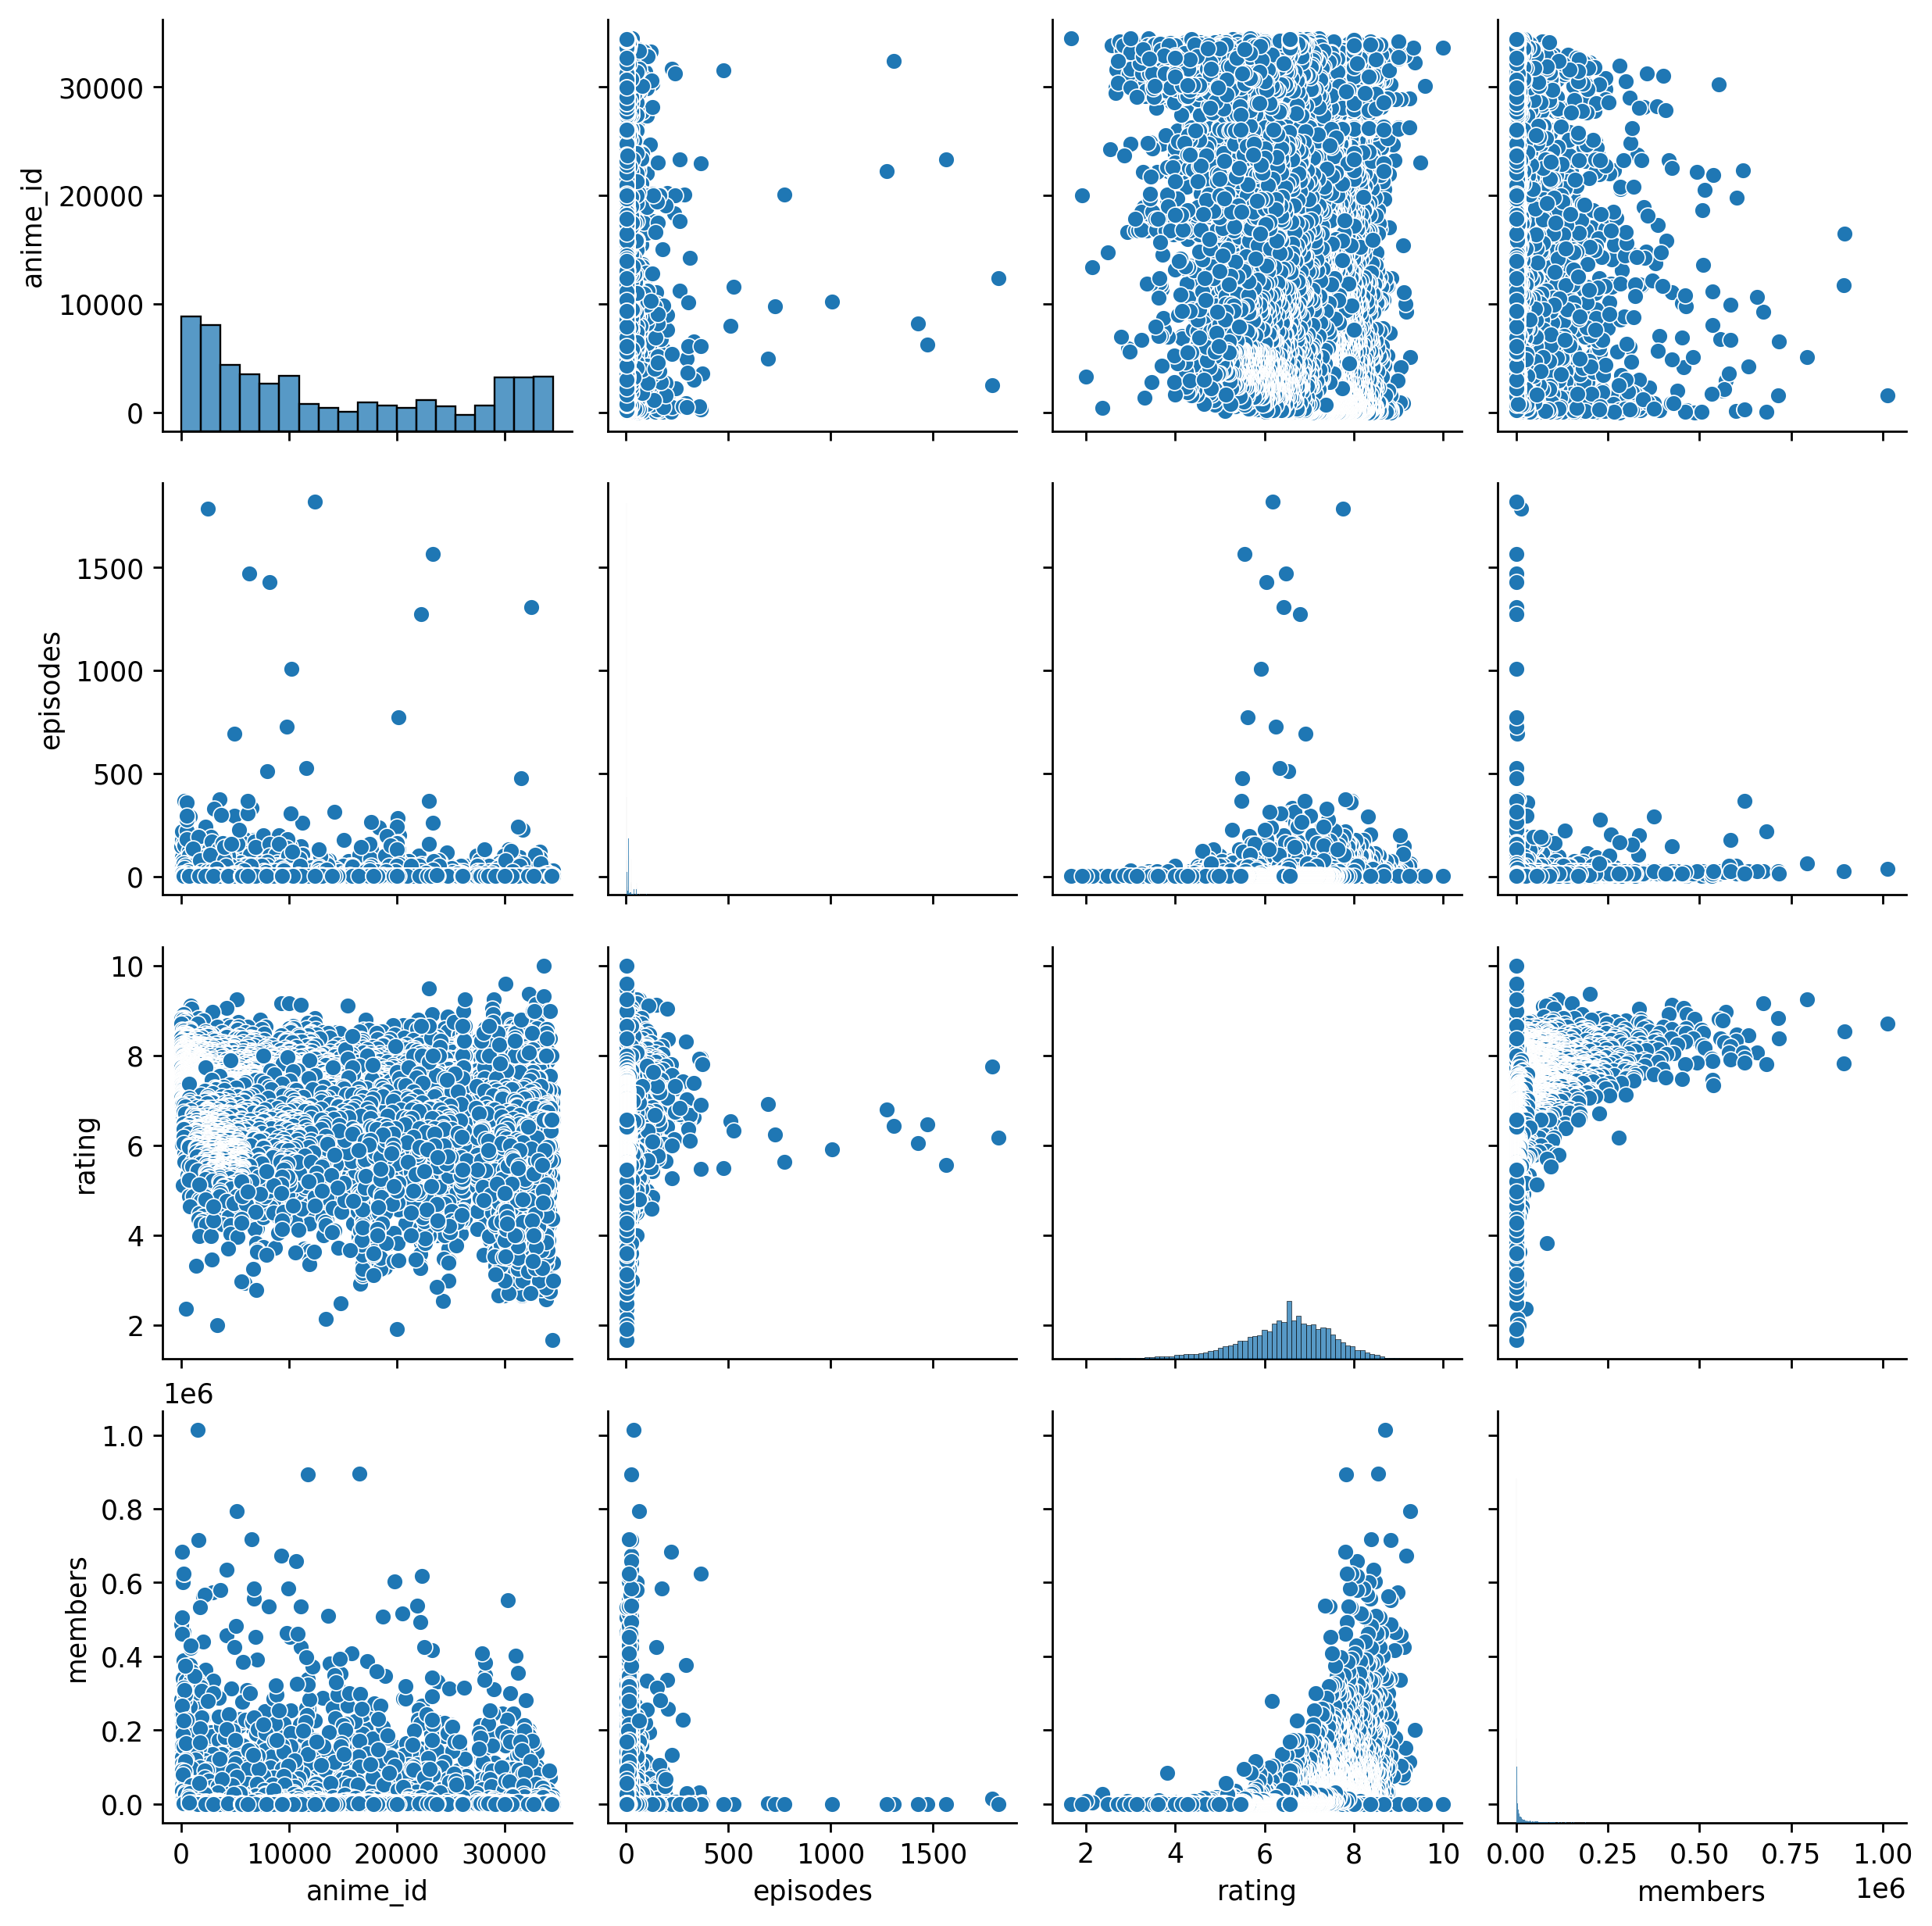

In [10]:
sns.pairplot(anime)

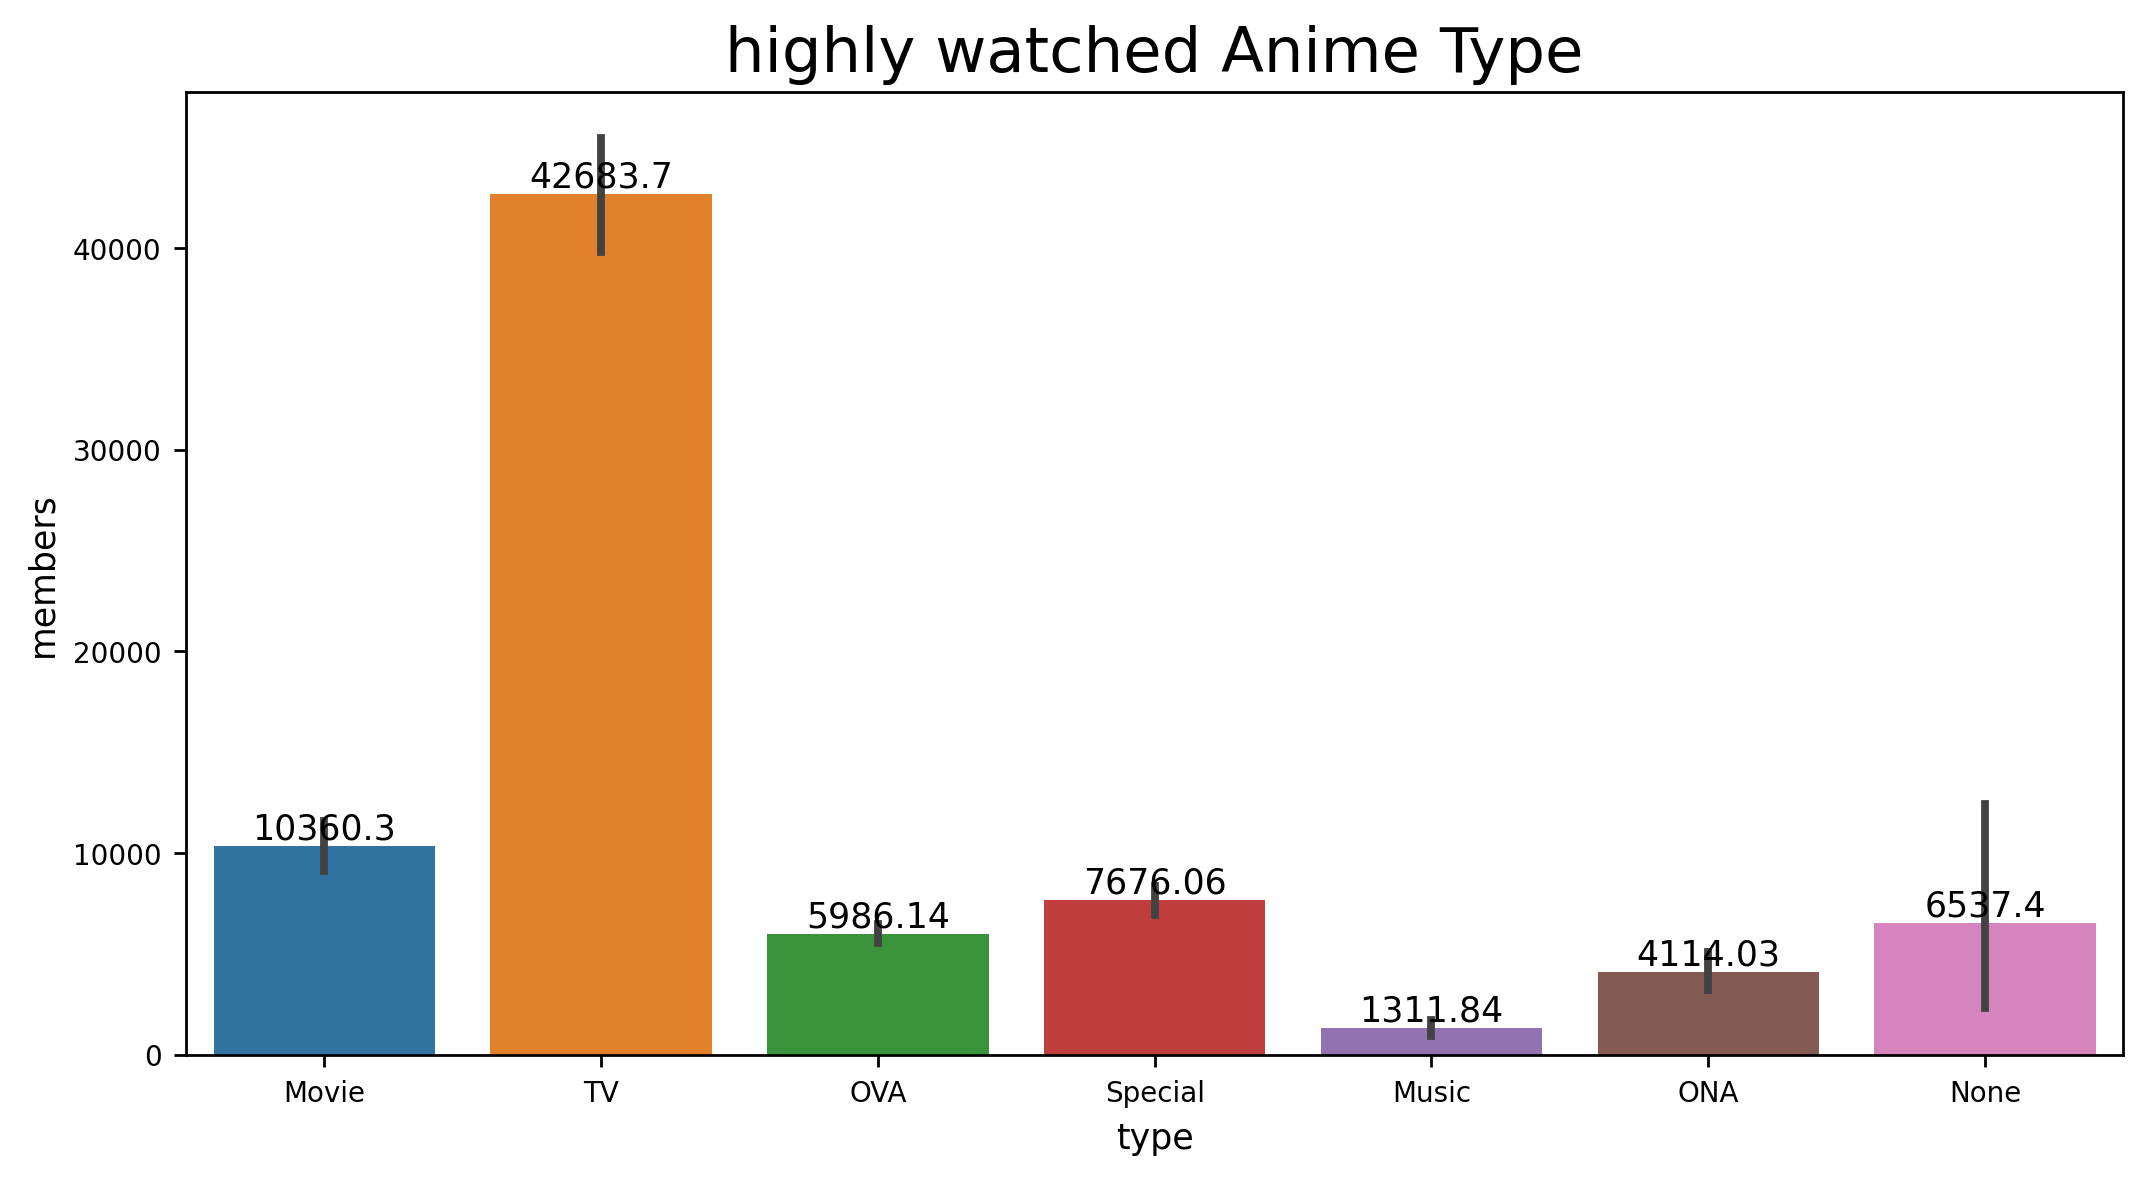

In [11]:
# Highly watched anime Type
ax = sns.barplot(y = 'members', x = 'type', data= anime, hue='type' )
plt.yticks(rotation = 0, fontsize = 8)
plt.xticks(rotation = 0, fontsize = 8)
plt.title('highly watched Anime Type',  fontsize = 18)
for i in ax.containers:
    ax.bar_label(i,)

* On popularity based, highly watched anime is of the 'TV' type, hence
for the new watchers we can recommend 'TV' type anime

### Preprocessing

In [12]:
# Splitting the string format of comma separated 'genre' into list of genres
anime['genre'] = [x.strip('()').split(',') for x in anime['genre']]
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.25,114262


In [13]:
# Converting 'type' of the anime to the list format for better modeling
anime['type'] = anime['type'].apply(lambda x:x.split())
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",[Movie],1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",[TV],64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",[TV],51,9.25,114262


In [15]:
anime['genre'].explode().unique()
# Here we can see due to the different string input for the same word the unique data cannot be generate

array(['Drama', ' Romance', ' School', ' Supernatural', 'Action',
       ' Adventure', ' Drama', ' Fantasy', ' Magic', ' Military',
       ' Shounen', ' Comedy', ' Historical', ' Parody', ' Samurai',
       ' Sci-Fi', 'Sci-Fi', ' Thriller', 'Comedy', ' Sports',
       ' Super Power', ' Space', ' Slice of Life', ' Mecha', 'Adventure',
       ' Music', ' Mystery', ' Seinen', 'Fantasy', ' Martial Arts',
       ' Vampire', ' Shoujo', ' Horror', ' Police', ' Psychological',
       'Mystery', 'Psychological', ' Demons', 'Ecchi', ' Josei', 'Josei',
       'Military', 'Romance', ' Shounen Ai', ' Game', 'Demons', ' Ecchi',
       'Dementia', ' Harem', 'Music', 'Game', ' Cars', ' Dementia',
       'Cars', 'Mecha', 'Horror', 'School', ' Kids', 'Historical', 'Kids',
       ' Shoujo Ai', 'Shounen', 'Shoujo', 'Magic', 'Harem',
       'Martial Arts', 'Sports', 'Slice of Life', 'Seinen', 'None',
       'Parody', 'Police', 'Thriller', 'Supernatural', 'Samurai',
       'Super Power', 'Vampire', 'Space',

In [16]:
# Hence, Removing spaces and '-' from a single entity if any present
# eg. 'Slice of Life' and 'Sci-Fi',' Sci-Fi'
anime['genre'] = anime['genre'].apply(lambda x:[i.replace(" ","") for i in x])
anime['genre'] = anime['genre'].apply(lambda x:[i.replace("-","") for i in x])
anime['genre'].explode().unique()

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'SciFi', 'Thriller', 'Sports',
       'SuperPower', 'Space', 'SliceofLife', 'Mecha', 'Music', 'Mystery',
       'Seinen', 'MartialArts', 'Vampire', 'Shoujo', 'Horror', 'Police',
       'Psychological', 'Demons', 'Ecchi', 'Josei', 'ShounenAi', 'Game',
       'Dementia', 'Harem', 'Cars', 'Kids', 'ShoujoAi', 'None', 'Hentai',
       'Yaoi', 'Yuri'], dtype=object)

#Feature Extraction:

1. Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
2. Convert categorical features into numerical representations if necessary.
3. Normalize numerical features if required.


In [17]:
# Here, Firstly We are using only non-numerical colummns which are suitable for content based model.
# Creating the tags
anime['tags'] = anime['genre'] + anime['type']
anime.head()

,anime_id,name,genre,type,episodes,rating,members,tags
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",[Movie],1,9.37,200630,"[Drama, Romance, School, Supernatural, Movie]"
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",[TV],64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"[SciFi, Thriller]",[TV],24,9.17,673572,"[SciFi, Thriller, TV]"
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."


In [18]:
new_anime = anime[['anime_id','name','tags']]
new_anime

,anime_id,name,tags
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural, Movie]"
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"[SciFi, Thriller, TV]"
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,"[Hentai, OVA]"
12290,5543,Under World,"[Hentai, OVA]"
12291,5621,Violence Gekiga David no Hoshi,"[Hentai, OVA]"
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,"[Hentai, OVA]"


In [19]:
# Separating all the values in the 'tags' into a space separated string
new_anime['tags'] = new_anime['tags'].apply(lambda x:" ".join(x))
new_anime['tags'] = new_anime['tags'].apply(lambda x:x.lower())
new_anime

,anime_id,name,tags
0,32281,Kimi no Na wa.,drama romance school supernatural movie
1,5114,Fullmetal Alchemist: Brotherhood,action adventure drama fantasy magic military ...
2,28977,Gintama°,action comedy historical parody samurai scifi ...
3,9253,Steins;Gate,scifi thriller tv
4,9969,Gintama&#039;,action comedy historical parody samurai scifi ...
...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,hentai ova
12290,5543,Under World,hentai ova
12291,5621,Violence Gekiga David no Hoshi,hentai ova
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,hentai ova


In [20]:
# Creating the vector matrix
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
converted_matrix = CV.fit_transform(new_anime['tags']).toarray()
converted_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
# Lets see the features with which the recommendation system will be modeled
CV.get_feature_names_out()

array(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons',
       'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martialarts',
       'mecha', 'military', 'movie', 'music', 'mystery', 'none', 'ona',
       'ova', 'parody', 'police', 'psychological', 'romance', 'samurai',
       'school', 'scifi', 'seinen', 'shoujo', 'shoujoai', 'shounen',
       'shounenai', 'sliceoflife', 'space', 'special', 'sports',
       'supernatural', 'superpower', 'thriller', 'tv', 'vampire', 'yaoi',
       'yuri'], dtype=object)

#Recommendation System:

1. Design a function to recommend anime based on cosine similarity.
2. Given a target anime, recommend a list of similar anime based on cosine similarity scores.
2. Experiment with different threshold values for similarity scores to adjust the recommendation list size.

#### Recommendation system on categorical features - 'genre' and 'type'

In [23]:
# Applying recommendation system based on cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(converted_matrix)
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.15811388, 1.        , 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [24]:
similarity.shape

(12294, 12294)

In [25]:
# Recommending top 10 anime using cosine similarity
def recommendation(anime_title):
    # Getting the index of the anime input name
    anime_index = new_anime[new_anime['name'] == anime_title].index[0]

    # Calculating the cosine similarity of the input anime with other animes
    distances = similarity[anime_index]

    # Getting the similar anime list of 10 items in descending order of similarity score
    anime_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:11]

    # Printing the name of similar anime
    for i in anime_list:
        print(new_anime.iloc[i[0],1])

In [26]:
recommendation('Gintama')

Gintama&#039;
Gintama&#039;: Enchousen
Gintama
Gintama (2017)
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama: Yorinuki Gintama-san on Theater 2D
Gintama Movie: Shinyaku Benizakura-hen
Gintama: Shinyaku Benizakura-hen
Gintama: Jump Festa 2014 Special
Peace Maker Kurogane


In [27]:
# recommending anime with the threshold criteria
def recommed_anime_with_threshold(anime_title,threshold):
    anime_index = new_anime[new_anime['name'] == anime_title].index[0]
    distances = similarity[anime_index]
    anime_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])

    for i in anime_list:
        if i[1]>threshold:
            print(new_anime.iloc[i[0],1])

In [28]:
# Higher the threshold less number of recommended animes are shown
recommed_anime_with_threshold('Gintama',0.9)

Gintama°
Gintama&#039;
Gintama&#039;: Enchousen
Gintama
Gintama (2017)


In [29]:
recommed_anime_with_threshold('Gintama',0.8)

Gintama°
Gintama&#039;
Gintama&#039;: Enchousen
Gintama
Gintama (2017)
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama: Yorinuki Gintama-san on Theater 2D
Gintama Movie: Shinyaku Benizakura-hen
Gintama: Shinyaku Benizakura-hen
Gintama: Jump Festa 2014 Special
Peace Maker Kurogane
Gintama: Nanigoto mo Saiyo ga Kanjin nano de Tasho Senobisuru Kurai ga Choudoyoi
Samurai Champloo
Gintama: Jump Festa 2015 Special
Dokkoida
Sengoku Otome: Momoiro Paradox


#### Recommendation system on numerical data - 'ratings' and 'members'

In [30]:
# Mean rating across the whole report
C = anime['rating'].mean()
C

6.47569952822515

In [31]:
# Minimum number of members who rated the anime to be listed
m = anime['members'].quantile(0.9)
m

45188.7

In [32]:
# Getting the list of animes to be listed
anime_list = anime.copy().loc[anime['members'] >= m]
anime_list.shape

(1230, 8)

In [33]:
# weighted ratings
def weighted_rating(data, m=m,C=C):
    v = data['members']
    R = data['rating']

    # Calculation done using IMDB formula
    return (v/(v+m)*R)+(m/(m+v)*C)

In [34]:
# Defining a new feature 'score' and calculating its value with weighted rating
anime_list['score'] = anime_list.apply(weighted_rating, axis=1)
anime_list.head()

,anime_id,name,genre,type,episodes,rating,members,tags,score
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",[Movie],1,9.37,200630,"[Drama, Romance, School, Supernatural, Movie]",8.837943
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",[TV],64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.110011
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",8.463757
3,9253,Steins;Gate,"[SciFi, Thriller]",[TV],24,9.17,673572,"[SciFi, Thriller, TV]",9.000609
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",[TV],51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",8.542555


##### Recommending top movies based on the average user ratings and members who have rated

In [35]:
# Sorting the anime based on their score
anime_list = anime_list.sort_values('score',ascending=False)
anime_list = anime_list[['anime_id','name','rating','members','score']]
anime_list.head()

,anime_id,name,rating,members,score
1,5114,Fullmetal Alchemist: Brotherhood,9.26,793665,9.110011
3,9253,Steins;Gate,9.17,673572,9.000609
6,11061,Hunter x Hunter (2011),9.13,425855,8.875365
0,32281,Kimi no Na wa.,9.37,200630,8.837943
10,4181,Clannad: After Story,9.06,456749,8.827339


#Evaluation:

1. Split the dataset into training and testing sets.
2. Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
3. Analyze the performance of the recommendation system and identify areas of improvement.

In [36]:
# Splitting the dataset into the training and testing
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_anime, test_size=0.2, random_state=42)

In [37]:
# Resetting the index so that we can find the index based cosine similarity
train_data.reset_index(inplace=True, drop=True)
train_data.head()

,anime_id,name,tags
0,5342,Asura Cryin&#039;,action mecha supernatural tv
1,9581,MM! Specials,comedy ecchi school special
2,9810,Nyani ga Nyandaa Nyandaa Kamen,comedy tv
3,1539,Touch: Cross Road - Kaze no Yukue,romance shounen sports special
4,4439,Kurenai Sanshirou,action martialarts sports tv


In [38]:
train_data.shape
# There are total 9835 entries with 3 columns in the training dataset

(9835, 3)

In [39]:
# Similarly, for test data set
test_data.reset_index(inplace=True, drop=True)
test_data.head()

,anime_id,name,tags
0,17209,Suzy&#039;s Zoo: Daisuki! Witzy - Happy Birthday,kids special
1,173,Tactics,comedy drama fantasy mystery shounen superpowe...
2,3616,Kamen no Maid Guy,action comedy ecchi superpower tv
3,18799,Take Your Way,action music seinen supernatural music
4,18831,Rinkaku,dementia horror music music


In [40]:
test_data.shape
# There are total 2459 entries with 3 columns

(2459, 3)

In [41]:
# Recommending top 5 anime using cosine similarity from the input of test data
def trained_recommendation(test_data, train_data):

    # Concatenating the row of the test data to the train data set
    # It will append it to the last row
    new_data = pd.concat([train_data, test_data], ignore_index=True)

    # Vectorization and cosine similarity
    trained_converted_matrix = CV.fit_transform(new_data['tags']).toarray()
    trained_similarity = cosine_similarity(trained_converted_matrix)

    # Finding distances of that test data index to the each entry in training data set
    distances = trained_similarity[9835]

    # Sorting the recommendation in descending order
    anime_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    recommended_anime={}
    recommended_anime['Anime_Name']=str(test_data.iloc[0,1])
    recommended_anime_list = []
    for i in anime_list:
        recommended_anime_list.append(str(new_data.iloc[i[0],1]))
    recommended_anime['Recommended_Anime'] = recommended_anime_list
    return recommended_anime

In [42]:
# Getting the recommendation for few first 6 values of test data set from train dataset
for i in range(0,6):
    print(trained_recommendation(test_data.iloc[[i]], train_data))

{'Anime_Name': 'Suzy&#039;s Zoo: Daisuki! Witzy - Happy Birthday', 'Recommended_Anime': ['Usaru-san', 'Donbe Monogatari', 'Okore!! Nonkuro', 'Boku wa Ou-sama (TV) Special', 'Sugar Bunnies Chocolate! Specials']}
{'Anime_Name': 'Tactics', 'Recommended_Anime': ['One Piece', 'GetBackers', 'Digimon Savers', 'Mini Hama: Minimum Hamatora', 'Tantei Gakuen Q']}
{'Anime_Name': 'Kamen no Maid Guy', 'Recommended_Anime': ['Sekirei: Pure Engagement', 'Yumeria', 'Sekirei', 'Needless', 'Ippatsu Kiki Musume']}
{'Anime_Name': 'Take Your Way', 'Recommended_Anime': ['First Squad', 'Mayonaka wa Junketsu', 'Tooryanse', 'Toute wa Sono Kotae', 'Transfer']}
{'Anime_Name': 'Rinkaku', 'Recommended_Anime': ['Agitated Screams of Maggots', 'Rinkaku', 'Airy Me', 'Noisy Birth', 'Natsu no Gero wa Fuyu no Sakana']}
{'Anime_Name': 'Suisei no Gargantia: Meguru Kouro, Haruka', 'Recommended_Anime': ['Ginga Hyouryuu Vifam: Kachua Kara no Tayori', 'Makyou Gaiden Le Deus', 'Ginga Hyouryuu Vifam: Atsumatta 13-nin', 'Haja Taise

In [43]:
# For evaluation
converted_matrix = CV.fit_transform(new_anime['tags']).toarray()
similarity = cosine_similarity(converted_matrix)
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

[(1111, 0.9128709291752769),
 (208, 0.8944271909999159),
 (1494, 0.8944271909999159),
 (1959, 0.8944271909999159),
 (60, 0.7999999999999999)]

#Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

#Answers
1. User-based collaborative filtering focuses on finding users who are having similar taste to the target user. User-based filtering  gives recommendation of unwatched or untested data to the target user by studying the other similar user interaction. Whereas item-based collaborative filtering focuses on finding items that are similar to the target item that a particular user likes.
2. Collaborative filtering is a method used in recommendation systems to predict a users interest based on the similarity of similar users. If similar idea agreed by similar users then they are likely to agree as well. It works by analyzing a large amount of user behavior data to make predictions.